# 1. Import Libraries

In [23]:
import os
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load data

* Define all files url
* Write function to read csv from Github url
* Save to DataFrame


In [2]:
annex1 = 'https://raw.githubusercontent.com/prattapong/Data-Science-Portfolio/main/Projects/Supermaket%20Sales%20Data/data/annex1.csv'
annex2 = 'https://raw.githubusercontent.com/prattapong/Data-Science-Portfolio/main/Projects/Supermaket%20Sales%20Data/data/annex2.csv'
annex3 = 'https://raw.githubusercontent.com/prattapong/Data-Science-Portfolio/main/Projects/Supermaket%20Sales%20Data/data/annex3.csv'
annex4 = 'https://raw.githubusercontent.com/prattapong/Data-Science-Portfolio/main/Projects/Supermaket%20Sales%20Data/data/annex4.csv'

In [3]:
def get_df_from_url(url):
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Create a file-like object from the raw content
        csv_content = StringIO(response.text)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_content)

        # Return DataFrame
        return df
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")

In [4]:
df_item = get_df_from_url(annex1)
df_transaction = get_df_from_url(annex2)
df_wholesale = get_df_from_url(annex3)
df_loss = get_df_from_url(annex4)

# 3. Merge data

In [7]:
def merge_all_df(df_transaction: pd.DataFrame = df_transaction,
                 df_item: pd.DataFrame = df_item,
                 df_wholesale: pd.DataFrame = df_wholesale,
                 df_loss: pd.DataFrame = df_loss):

    df_merge = df_transaction.merge(df_item,
                                    how = 'left',
                                    on = 'Item Code')
    df_merge = df_merge.merge(df_wholesale,
                            how = 'left',
                            on = ['Date', 'Item Code'])
    df_merge = df_merge.merge(df_loss.drop('Item Name', axis = 1),
                            how = 'left',
                            on = 'Item Code')
    
    return df_merge

In [8]:
df_merge = merge_all_df()
df_merge.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name,Wholesale Price (RMB/kg),Loss Rate (%)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,2.10,22.27
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,1011010101,Flower/Leaf Vegetables,7.03,14.43
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,1011010101,Flower/Leaf Vegetables,4.60,13.70


# 3. EDA

## 3.1 Statistical Summary

In [9]:
df_item.groupby('Item Code', as_index = False).nunique().sort_values(by = 'Category Name', ascending = False).head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,1,1,1
172,102900011032480,1,1,1
159,102900011032114,1,1,1
160,102900011032145,1,1,1
161,102900011032176,1,1,1


In [10]:
df_item.shape[0] == df_item['Item Code'].nunique()

True

Item Code and has no duplication

In [11]:
display(df_merge.describe(include = 'all'))

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name,Wholesale Price (RMB/kg),Loss Rate (%)
count,878503,878503,8.785030e+05,878503.000000,878503.000000,878503,878503,878503,8.785030e+05,878503,878503.000000,878503.000000
unique,1085,849632,NaN,NaN,NaN,2,2,242,NaN,6,NaN,NaN
top,2021-02-10,10:05:12.655,NaN,NaN,NaN,sale,No,Wuhu Green Pepper (1),NaN,Flower/Leaf Vegetables,NaN,NaN
freq,3747,6,NaN,NaN,NaN,878042,831137,69945,NaN,331968,NaN,NaN
mean,NaN,NaN,1.030313e+14,0.536112,8.917144,NaN,NaN,NaN,1.011010e+09,NaN,5.663150,10.122526
std,NaN,NaN,7.174368e+11,0.400087,6.311265,NaN,NaN,NaN,2.582929e+02,NaN,4.229638,4.741439
min,NaN,NaN,1.029000e+14,-9.082000,0.100000,NaN,NaN,NaN,1.011010e+09,NaN,0.010000,0.000000
25%,NaN,NaN,1.029000e+14,0.290000,4.900000,NaN,NaN,NaN,1.011010e+09,NaN,3.000000,6.270000
50%,NaN,NaN,1.029000e+14,0.435000,7.900000,NaN,NaN,NaN,1.011010e+09,NaN,4.690000,9.430000
75%,NaN,NaN,1.029000e+14,0.742000,10.800000,NaN,NaN,NaN,1.011011e+09,NaN,7.010000,13.620000


In [12]:
df_merge.dtypes

Date                            object
Time                            object
Item Code                        int64
Quantity Sold (kilo)           float64
Unit Selling Price (RMB/kg)    float64
Sale or Return                  object
Discount (Yes/No)               object
Item Name                       object
Category Code                    int64
Category Name                   object
Wholesale Price (RMB/kg)       float64
Loss Rate (%)                  float64
dtype: object

## 3.2 Check Null

In [13]:
print(df_merge.isna().sum())

Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Item Name                      0
Category Code                  0
Category Name                  0
Wholesale Price (RMB/kg)       0
Loss Rate (%)                  0
dtype: int64


## 3.3 Visualize

In [29]:
num_category = df_merge['Category Code'].nunique()
categories = df_merge['Category Name'].unique()
print(f'Total Category: {num_category}\nCategory lists:\n{categories}')

Total Category: 6
Category lists:
['Capsicum' 'Flower/Leaf\xa0Vegetables' 'Aquatic Tuberous Vegetables'
 'Edible Mushroom' 'Cabbage' 'Solanum']


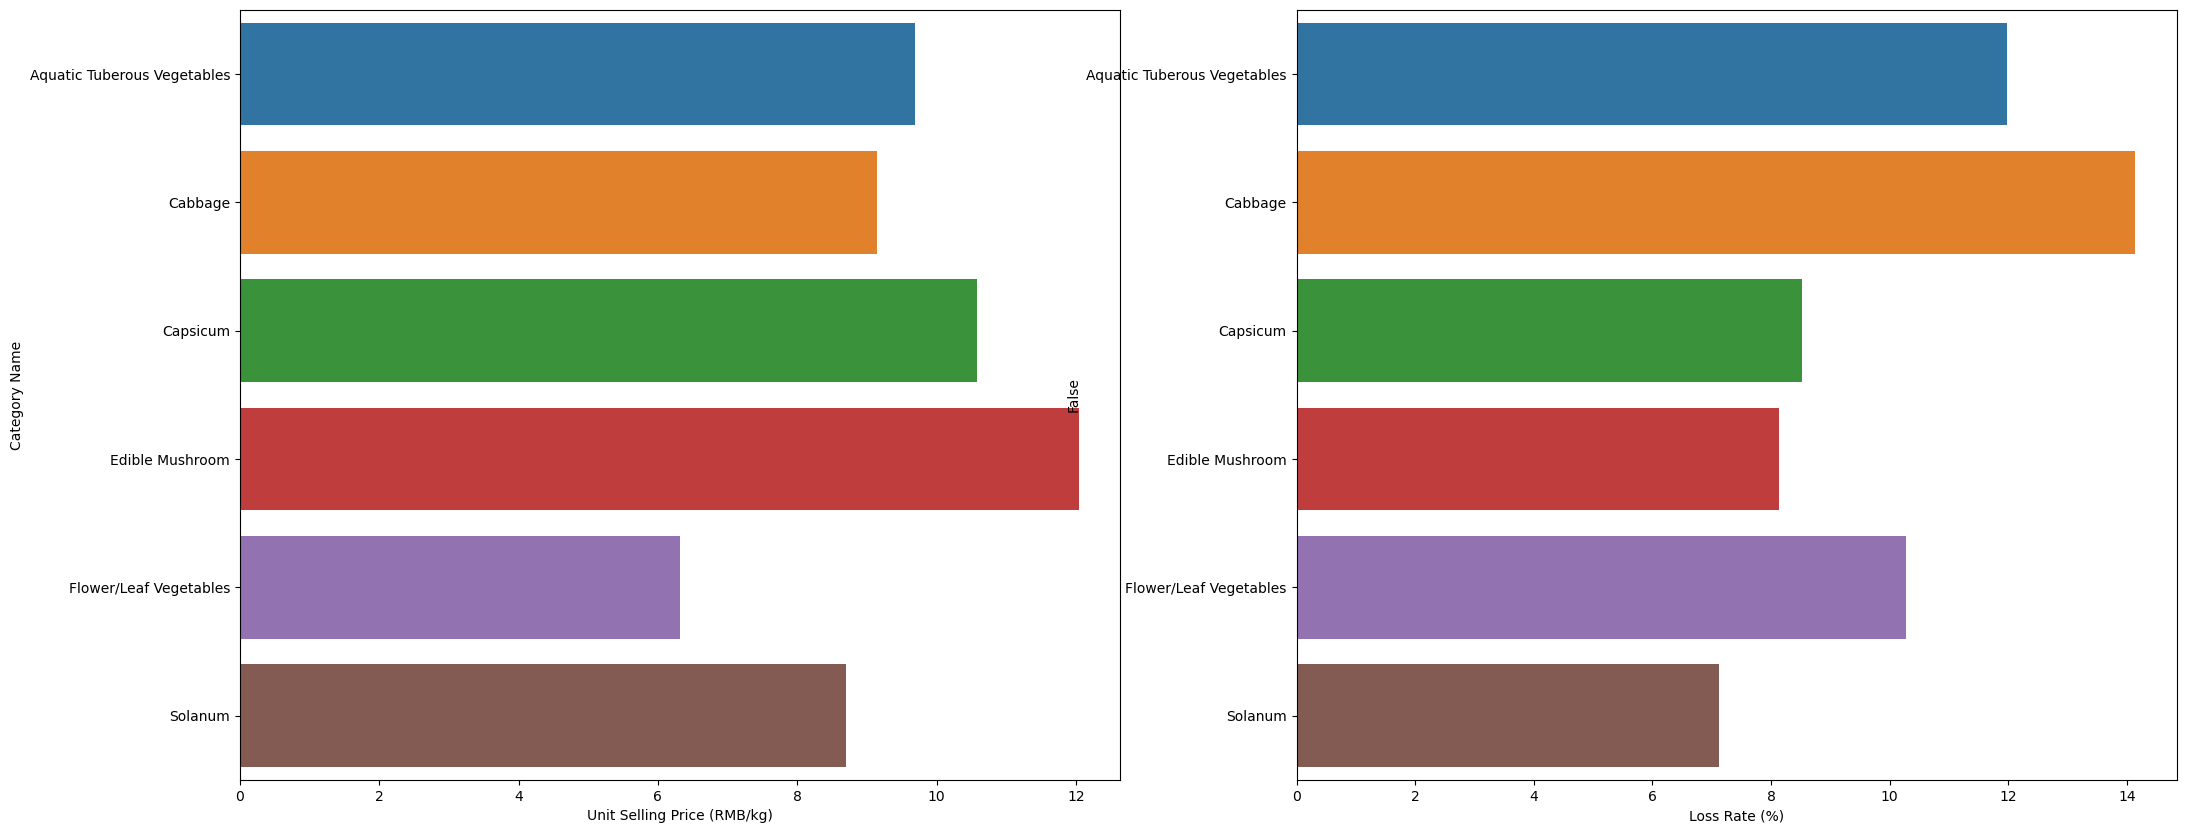

In [73]:
df_merge['Sales'] = df_merge['Quantity Sold (kilo)'] * df_merge['Unit Selling Price (RMB/kg)']

fig, ax = plt.subplots(1, 2, figsize=(25, 10))
sns.barplot(data = df_merge.groupby('Category Name', as_index = False)['Unit Selling Price (RMB/kg)'].mean(),
            y = 'Category Name',
            x = 'Unit Selling Price (RMB/kg)',
            ax = ax[0],)
sns.barplot(data = df_loss.merge(df_item.drop('Item Name', axis = 1),
                                 how = 'left',
                                 on = 'Item Code').groupby('Category Name', as_index = False)['Loss Rate (%)'].mean(),
            y = 'Category Name',
            x = 'Loss Rate (%)',
            ax = ax[1])
plt.ylabel(False)
plt.show()

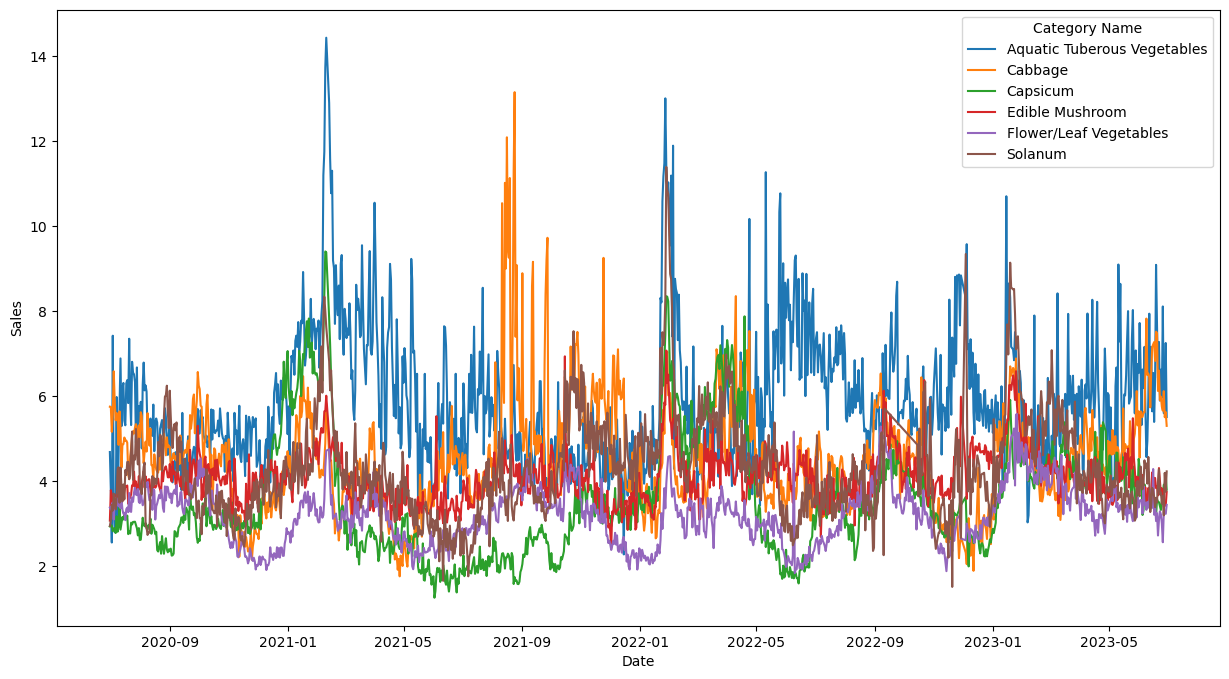

In [74]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

plt.figure(figsize = (15,8))
sns.lineplot(df_merge.groupby(['Category Name','Date'], as_index = False)['Sales'].mean(),
            x = 'Date',
            y = 'Sales',
            hue = 'Category Name')
plt.show()

In [59]:
df_merge.groupby(['Category Name', 'Sale or Return']).size().reset_index(name='Percentage')

,Category Name,Sale or Return,Percentage
0,Aquatic Tuberous Vegetables,return,34
1,Aquatic Tuberous Vegetables,sale,58613
2,Cabbage,return,46
3,Cabbage,sale,86524
4,Capsicum,return,102
5,Capsicum,sale,207894
6,Edible Mushroom,return,83
7,Edible Mushroom,sale,148341
8,Flower/Leaf Vegetables,return,179
9,Flower/Leaf Vegetables,sale,331789
